In [41]:
import numpy as np

Atividade Prática

In [42]:
def solucao_direta(A, B):
    n = len(A)

    # Triangulando com a Eliminação de Gauss
    for k in range(0, n-1):
        for i in range(k+1, n):
            m = (A[i][k])/(A[k][k])

            for j in range(k, n):
                A[i][j] = A[i][j] - m*A[k][j]
            B[i] = B[i] - m*B[k]


    # Resolvendo o sistema triangular
    x = []

    for i in range(0, n):
        x.append(0)

    x[n-1] = B[n-1]/A[n-1][n-1]

    c = 1
    
    for i in range(n-2, -1, -1):
        soma = 0
        c += 1
        for j in range(n-1, i, -1):
            soma += (A[i][j]*x[j])
        x[n-c] = (B[i] - soma)/(A[i][i])

    return x

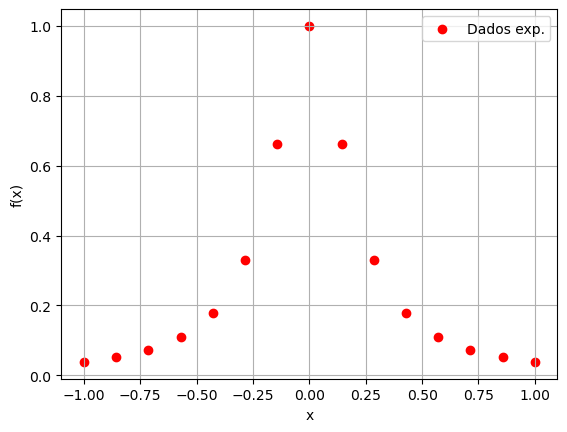

In [43]:
### 1

x = np.linspace(-1, 1, 15)
fx = 1.0/(1.0 + 25.0*(x**2))


import matplotlib.pyplot as plt


plt.scatter(x, fx, color='red', label='Dados exp.')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

In [44]:
### 2

a = np.copy(fx)
n = len(x) # n = 15
h = []
for j in range(0, n-1):
    h.append(x[j+1] - x[j])


# Obtendo a matriz A:
A = np.zeros((n, n))
for i in range(0, n):
    for j in range(0, n):
        if ((i == 0) and (j == 0)) or ((i == n-1) and (j == n-1)):
            A[i][j] = 1
        elif i==j:
            A[i][j] = 2*(h[i-1]+h[j])
            A[i][j-1] = h[i-1]
            A[i][j+1] = h[j]

for i in range(0, len(A)):
    for j in range(0, len(A)):
        print(f'{A[i][j]:.2f} ', end="")
    print('\n')


# Obtendo a matriz B:
B = [0]*(n)

for j in range(1, n-1):
    B[j] = (3/h[j])*(a[j+1]-a[j]) - (3/h[j-1])*(a[j]-a[j-1])
# B[n] = 0

print('\n')
print(B)

1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 

0.14 0.57 0.14 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 

0.00 0.14 0.57 0.14 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 

0.00 0.00 0.14 0.57 0.14 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 

0.00 0.00 0.00 0.14 0.57 0.14 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 

0.00 0.00 0.00 0.00 0.14 0.57 0.14 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 

0.00 0.00 0.00 0.00 0.00 0.14 0.57 0.14 0.00 0.00 0.00 0.00 0.00 0.00 0.00 

0.00 0.00 0.00 0.00 0.00 0.00 0.14 0.57 0.14 0.00 0.00 0.00 0.00 0.00 0.00 

0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.14 0.57 0.14 0.00 0.00 0.00 0.00 0.00 

0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.14 0.57 0.14 0.00 0.00 0.00 0.00 

0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.14 0.57 0.14 0.00 0.00 0.00 

0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.14 0.57 0.14 0.00 0.00 

0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.14 0.57 0.14 0.00 


In [45]:
### 2

# Resolvendo para obter c e d:

c = solucao_direta(A, B)
# c = np.linalg.solve(A,B)

d = []
b = []
for j in range(0, n-1):
    b.append(((a[j+1]-a[j])/h[j]) - (h[j]/3)*(2*c[j]+c[j+1]))
    d.append((c[j+1]-c[j])/(3*h[j]))

print(a) # len(a) == 15
print(b) # len(b) == 14
print(c) # len(c) == 15
print(d) # len(d) == 14

[0.03846154 0.0516333  0.0727003  0.1091314  0.17883212 0.32885906
 0.66216216 1.         0.66216216 0.32885906 0.17883212 0.1091314
 0.0727003  0.0516333  0.03846154]
[0.08223494537812316, 0.11213706393289996, 0.1882307226519751, 0.3424002485565873, 0.6709365042224138, 1.5881345375312903, 3.1264562985030833, -8.881784197001252e-16, -3.1264562985030833, -1.5881345375312923, -0.6709365042224146, -0.34240024855658735, -0.18823072265197513, -0.1121370639329]
[0.0, 0.2093148298834376, 0.3233407811500882, 0.7558459001821967, 1.5439078894785905, 4.876478343683548, 5.891773983118999, -27.776968072640575, 5.891773983118985, 4.876478343683557, 1.5439078894785911, 0.7558459001821964, 0.3233407811500896, 0.20931482988343675, 0.0]
[0.4884012697280213, 0.26606055295551795, 1.0091786110749195, 1.8388113083582531, 7.775997726478238, 2.369023158682719, -78.56039813010564, 78.56039813010567, -2.369023158682667, -7.7759977264782565, -1.8388113083582522, -1.0091786110749166, -0.2660605529555234, -0.48840

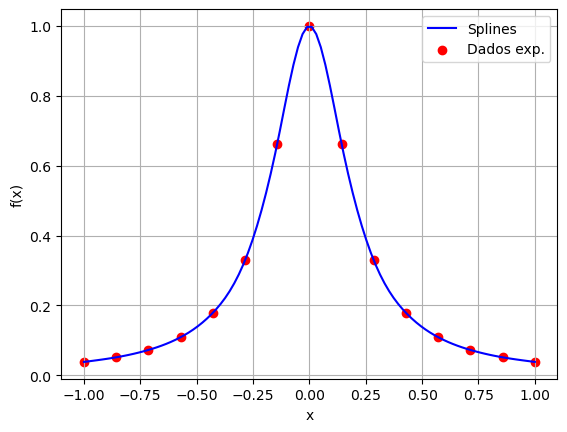

In [46]:
def Spline(a, b, c, d, xc, xp):

    xd = np.array(xc)
    n = len(xd)
    # h = [0.0]*(n-1)
    # for i in range(0, n-1, 1):
    #     h[i] = xd[i+1]-xd[i]

    ind = 0

    ### Obtendo indice da spline que sera usada
    for j in range(0, n-1, 1):
        if ((xc[j] <= xp) and (xp <= xc[j+1])):
            ind = int(j)

    ### Calculo do valor de S(x)
    S = a[ind]+(b[ind]*(xp-xc[ind]))+(c[ind]*pow(xp-xc[ind],2))+(d[ind]*pow(xp-xc[ind],3)) 

    return S


xm = np.linspace(x[0], x[-1], 100)

ym = []
for i in range(0, len(xm)):
    ym.append(Spline(a, b, c, d, x, xm[i]))

plt.plot(xm, ym, color='blue', label='Splines')
plt.scatter(x, fx, color='red', label='Dados exp.')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

In [47]:
### 3

# Obtendo splines
precisao = 10


S = np.zeros((n-1, precisao))
for j in range(0, n-1):
    xm = np.linspace(x[j], x[j+1], precisao)
    for i in range(0, precisao):
        S[j][i] = a[j] + b[j]*(xm[i]-x[j]) + c[j]*((xm[i]-x[j])**2) + d[j]*((xm[i]-x[j])**3)

for i in range(0, n-1):
    for j in range(0, precisao):
        print(f'{S[i][j]:.2f} ', end="")
    print('\n')


0.04 0.04 0.04 0.04 0.04 0.05 0.05 0.05 0.05 0.05 

0.05 0.05 0.06 0.06 0.06 0.06 0.06 0.07 0.07 0.07 

0.07 0.08 0.08 0.08 0.09 0.09 0.09 0.10 0.10 0.11 

0.11 0.11 0.12 0.13 0.13 0.14 0.15 0.16 0.17 0.18 

0.18 0.19 0.20 0.22 0.23 0.25 0.26 0.28 0.30 0.33 

0.33 0.36 0.38 0.42 0.45 0.49 0.53 0.57 0.61 0.66 

0.66 0.71 0.76 0.82 0.86 0.91 0.95 0.97 0.99 1.00 

1.00 0.99 0.97 0.95 0.91 0.86 0.82 0.76 0.71 0.66 

0.66 0.61 0.57 0.53 0.49 0.45 0.42 0.38 0.36 0.33 

0.33 0.30 0.28 0.26 0.25 0.23 0.22 0.20 0.19 0.18 

0.18 0.17 0.16 0.15 0.14 0.13 0.13 0.12 0.11 0.11 

0.11 0.10 0.10 0.09 0.09 0.09 0.08 0.08 0.08 0.07 

0.07 0.07 0.07 0.06 0.06 0.06 0.06 0.06 0.05 0.05 

0.05 0.05 0.05 0.05 0.05 0.04 0.04 0.04 0.04 0.04 



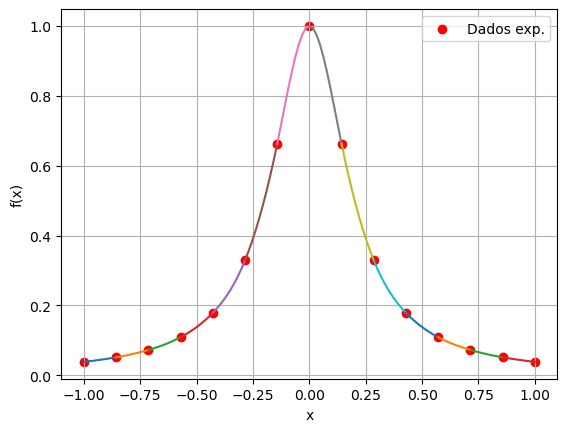

In [48]:

for i in range(0, n-1):
    xm = np.linspace(x[i], x[i+1], precisao)
    plt.plot(xm, S[i])

plt.scatter(x, fx, color='red', label='Dados exp.')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Funções Prontas:

In [49]:
### Montando funções que fazem tudo

def Coef_Splines(x, fx):

    a = np.copy(fx) # Obtendo 'a'
    n = len(x) 
    h = [] # Obtendo 'h'
    for j in range(0, n-1):
        h.append(x[j+1] - x[j])


    # Obtendo a matriz A:
    A = np.zeros((n, n))
    for i in range(0, n):
        for j in range(0, n):
            if ((i == 0) and (j == 0)) or ((i == n-1) and (j == n-1)):
                A[i][j] = 1
            elif i==j:
                A[i][j] = 2*(h[i-1]+h[j])
                A[i][j-1] = h[i-1]
                A[i][j+1] = h[j]

    # Obtendo a matriz B:
    B = [0]*(n)

    for j in range(1, n-1):
        B[j] = (3/h[j])*(a[j+1]-a[j]) - (3/h[j-1])*(a[j]-a[j-1])


    # Resolvendo para obter c:

    c = np.linalg.solve(A,B)

    # Obtendo b e d:
    d = []
    b = []
    for j in range(0, n-1):
        b.append(((a[j+1]-a[j])/h[j]) - (h[j]/3)*(2*c[j]+c[j+1]))
        d.append((c[j+1]-c[j])/(3*h[j]))

    return a, b, c, d # Obtem os vetores a, b, c e d


def Ponto_Splines(a, b, c, d, xc, x): # Retorna um valor correspondende a determinado x que é parte de determinada spline

    xd = np.array(xc)
    n = len(xd)

    ind = 0

    ### Obtendo indice da spline que sera usada
    for j in range(0, n-1, 1):
        if ((xc[j] <= x) and (x <= xc[j+1])):
            ind = int(j)

    ### Calculo do valor de S(x)
    S = a[ind]+(b[ind]*(x-xc[ind]))+(c[ind]*pow(x-xc[ind],2))+(d[ind]*pow(x-xc[ind],3)) 

    return S


def Obter_Splines(a, b, c, d, x, precisao): # Retorna uma matriz onde cada linha é o conjunto de cordenadas y associdados a pontos de uma Spline (cada linha é uma Spline)
    n = len(x)

    S = np.zeros((n-1, precisao))
    for j in range(0, n-1):
        xm = np.linspace(x[j], x[j+1], precisao)
        for i in range(0, precisao):
            S[j][i] = a[j] + b[j]*(xm[i]-x[j]) + c[j]*((xm[i]-x[j])**2) + d[j]*((xm[i]-x[j])**3)
            
    return S

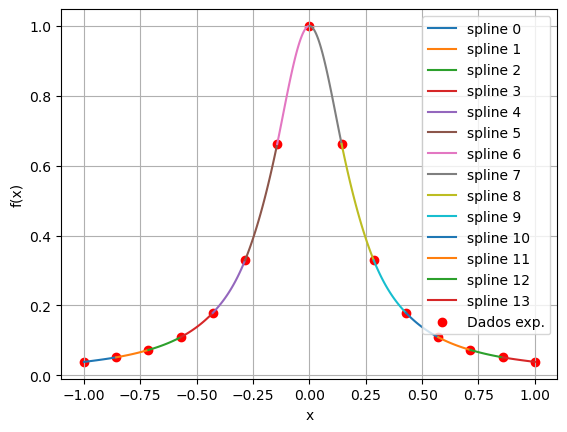

In [50]:
x = np.linspace(-1, 1, 15)
fx = 1.0/(1.0 + 25.0*(x**2))

prec = 100

a, b, c, d = Coef_Splines(x, fx)
Spl = Obter_Splines(a, b, c, d, x, prec)


import matplotlib.pyplot as plt

for i in range(0, len(x)-1):
    xm = np.linspace(x[i], x[i+1], prec)
    l = f'spline {i}'
    plt.plot(xm, Spl[i], label=l)

plt.scatter(x, fx, color='red', label='Dados exp.')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()